**Task 1: **

In [1]:
# Importing the dataset from keras
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
# Checking the ‘type’
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [3]:
# Checking the shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


<Figure size 432x288 with 0 Axes>

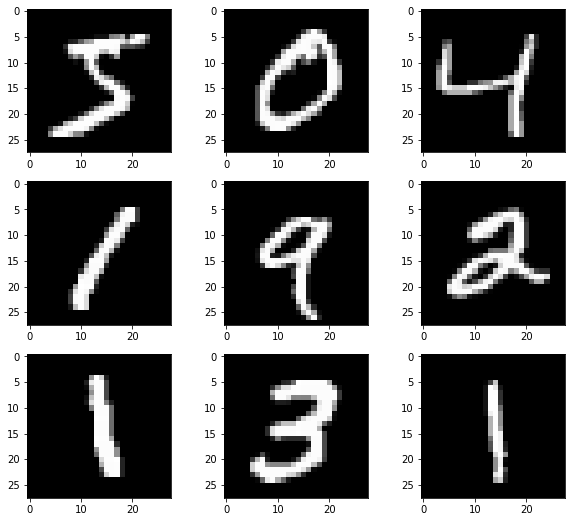

In [4]:
import matplotlib.pyplot as plt
plt.gray()
plt.figure(figsize = (10,9))
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(x_train[i])

In [5]:
# Printing examples in 'y_train'
for i in range(5):
  print(y_train[i])

5
0
4
1
9


In [6]:
# Checking the minimum and maximum values of x_train
print(x_train.min())
print(x_train.max())

0
255


In [7]:
x_train = x_train.astype("float32") 
x_test = x_test.astype("float32")
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
# Checking the minimum and maximum values of x_train
print(x_train.min())
print(x_train.max())

0.0
1.0


In [9]:
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)

In [10]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [12]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np
total_clusters = len(np.unique(y_test))
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
# Fitting the model to training set
kmeans.fit(X_train)

MiniBatchKMeans(n_clusters=10)

In [13]:
kmeans.labels_


array([0, 8, 2, ..., 4, 3, 3], dtype=int32)

In [14]:
def retrieve_info(cluster_labels,y_train):
  reference_labels = {}
  for i in range(len(np.unique(kmeans.labels_))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num
  return reference_labels
  

In [15]:
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]

In [16]:
print(number_labels[:20].astype("int"))
print(y_train[:20])

[3 0 4 1 9 2 1 2 1 7 3 1 3 6 1 7 2 2 6 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [17]:
from sklearn.metrics import accuracy_score
print(accuracy_score(number_labels,y_train))

0.5336


**Task 2: Optimizing the code to improve the accuracy**

In [25]:
def calculate_metrics(model,output):
 print("Number of clusters is {}".format(model.n_clusters))
 print("Inertia : {}".format(model.inertia_))
 print("Homogeneity :       {}".format(metrics.homogeneity_score(output,model.labels_)))

In [26]:
from sklearn import metrics
cluster_number = [10,16,36,64,144,256]
for i in cluster_number:
  total_clusters = len(np.unique(y_test))
kmeans = MiniBatchKMeans(n_clusters = i)
kmeans.fit(X_train)
calculate_metrics(kmeans,y_train)
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
 number_labels[i] = reference_labels[kmeans.labels_[i]]
print("Accuracy score : {}".format(accuracy_score(number_labels,y_train)))
print("\n")

Number of clusters is 256
Inertia : 1500085.5
Homogeneity :       0.8457729731007053
Accuracy score : 0.9017666666666667




Task 3 : 

In [37]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [38]:
# Checking the ‘type’
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [39]:
# Checking the shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


<Figure size 432x288 with 0 Axes>

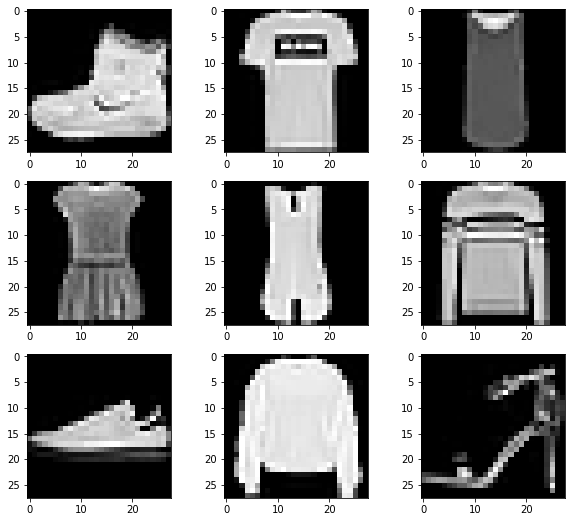

In [40]:
import matplotlib.pyplot as plt
plt.gray() # B/W Images
plt.figure(figsize = (10,9)) # Adjusting figure size
# Displaying a grid of 3x3 images
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(x_train[i])

In [41]:
# Printing examples in 'y_train'
for i in range(5):
  print(y_train[i])

9
0
0
3
0


In [42]:
# Checking the minimum and maximum values of x_train
print(x_train.min())
print(x_train.max())

0
255


In [43]:
# Data Normalization
# Conversion to float
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [44]:
# Checking the minimum and maximum values of x_train
print(x_train.min())
print(x_train.max())

0.0
1.0


In [46]:
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)

In [47]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np
total_clusters = len(np.unique(y_test))
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
# Fitting the model to training set
kmeans.fit(X_train)

MiniBatchKMeans(n_clusters=10)

In [48]:
kmeans.labels_

array([7, 6, 0, ..., 3, 0, 5], dtype=int32)

In [49]:
def retrieve_info(cluster_labels,y_train):
  reference_labels = {}
  for i in range(len(np.unique(kmeans.labels_))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num
  return reference_labels
  

In [50]:
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]

In [51]:
# Comparing Predicted values and Actual values
print(number_labels[:20].astype("int"))
print(y_train[:20])

[9 0 6 6 3 2 7 2 5 5 0 9 7 7 7 9 1 0 2 6]
[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]


In [52]:
# Calculating accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(number_labels,y_train))

0.53225
